### ASTR 8070: Astrostatistics
***N. Pol***
___

# Homework 9
### Due: Friday, Apr 18th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

$$
\textbf{SOLUTION}
$$


1. We can use the following equation to algebraically explain the output of this network:

$$
y = f(w_1 x_1 + w_2 x_2 + b) = w_1 x_1 + w_2 x_2 + b
$$


2. Changed the number of neurons to 2, changed activation to RelU, and kept learning rate at 0.01. Test loss= 0.220 and training loss= 0.240, the loss values were a bit hiher than expected, however we can still conclude that this model could learn nonlinearities. This model is slightly better than the linear model for effective data modeling but it still isn't complex enough.

3. Changed the number of neurons to 3, changed activation to RelU, and kept learning rate at 0.01. Test loss= 0.182 and training loss= 0.132. After multiple runs (4) the loss dropped closer to the target range we would like which is approximately 0.177. This model did improve in overall performance.

4. Since from the previous model there was a drop in loss value when we added 3 neurons, we continued along that path and added a fourth neuron and kept all the other variables the same.Test loss= 0.158 and training loss= 0.142 , which was better than expected since the test loss was lower than the tagreted value of 0.177.

5. The model converged a bit faster, it converged in under 500 epochs. So I would say increasing the model size improved the overall fit. Test loss was recorded at 244 Epochs and it had already conveged to our targeted loss value of  0.177.

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Part.1 
# Load the data
#This is the exact code from Homework #8, I just copied it over. 
data = np.load("/Users/kendrajeanjacques/repos/ASTR_3300_S2025/coursework/homeworks/hw_data/hw8_data_1.npy")

# Find and Print Column names 
print("Column names:", data.dtype.names)

# Create color arrays for Redshift and spectral class
u_g = data['u'] - data['g']
g_r = data['g'] - data['r']
r_i = data['r'] - data['i']
i_z = data['i'] - data['z']

#Count how many regular galaxies and quasars

unique, counts = np.unique(data['specClass'], return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class counts:", class_counts)

Column names: ('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')
Class counts: {'GALAXY': 42808, 'QSO': 7192}


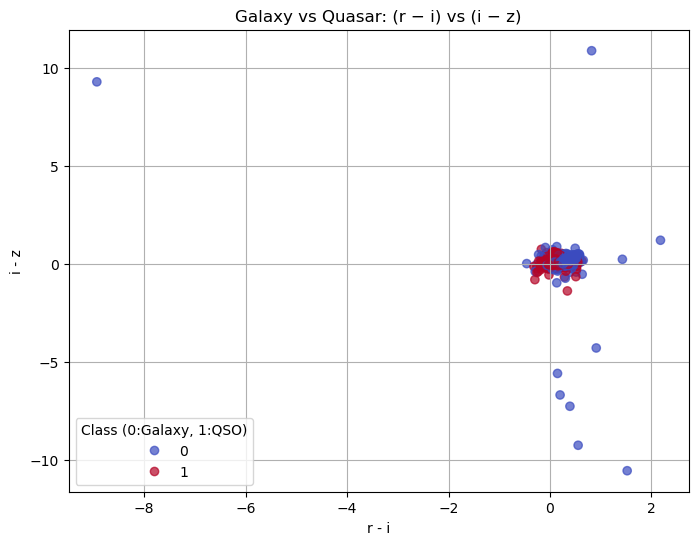

In [15]:
#Part.2
#Slices the data array to take every other 10th row
data_redu = data[::10]

# Compute color indices
r_i = data_redu['r'] - data_redu['i']
i_z = data_redu['i'] - data_redu['z']

spec_class = np.array([0 if label == 'GALAXY' else 1 for label in data_redu['specClass']])

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(r_i, i_z, c=spec_class, cmap='coolwarm', alpha=0.7)
plt.xlabel('r - i')
plt.ylabel('i - z')
plt.title('Galaxy vs Quasar: (r − i) vs (i − z)')
plt.legend(*scatter.legend_elements(), title="Class (0:Galaxy, 1:QSO)")
plt.grid(True)
plt.show()


In [21]:
#Part.3
#Adapted from Lecture 21 

from sklearn.model_selection import train_test_split

X = np.column_stack((r_i, i_z))
y = spec_class 

#Set random state to 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
#Part.4
#Adapted from Lecture 21 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


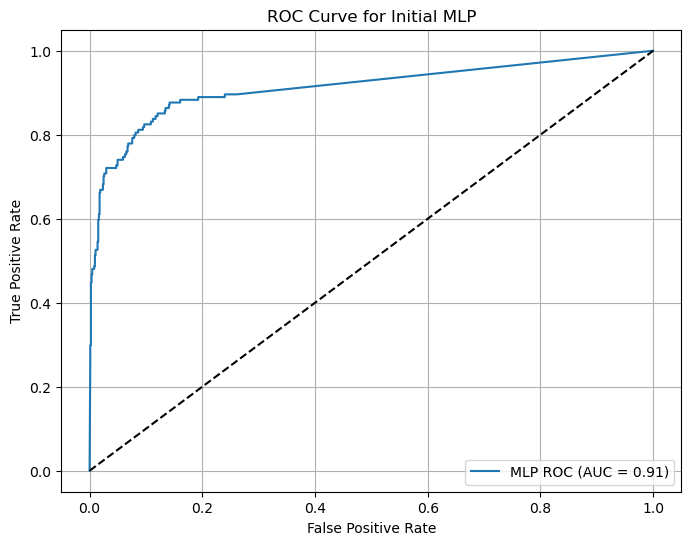

In [24]:
#Part.5

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc

mlp = MLPClassifier(
    hidden_layer_sizes=(5, 2),
    activation='relu',
    solver='sgd',
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

#Probability Prediction
#Plotting ROC Curve 
y_score = mlp.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'MLP ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Initial MLP')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [25]:
#Part.6

from sklearn.model_selection import GridSearchCV

#Provide in question
parameters = {
    'solver': ['lbfgs', 'sgd', 'adam'],
    'hidden_layer_sizes': [(2, 2), (5, 5), (5, 2), (5, 5, 5)],
    'activation': ['relu', 'tanh'],
    'random_state': [42],
    'max_iter': [1000]
}

grid_search = GridSearchCV(
    MLPClassifier(),
    parameters,
    n_jobs=-1,
    cv=5
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Training Set Score:", grid_search.score(X_train_scaled, y_train))


/opt/anaconda3/envs/astr3300/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/astr3300/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/astr3300/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed t

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}
Training set score: 0.93925


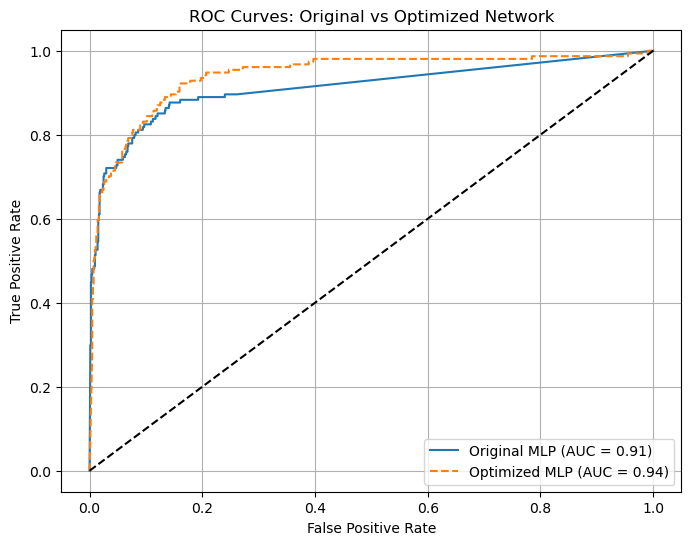

In [26]:
#Part.7
#Extracting Best parameters which were found in part 6.
best_params = grid_search.best_params_

#Training new Model based on parameters from part 6.
best_mlp = MLPClassifier(**best_params)
best_mlp.fit(X_train_scaled, y_train)

#Probability Prediction 
#Plotting ROC curves
y_best_score = best_mlp.predict_proba(X_test_scaled)[:, 1]
fpr_best, tpr_best, _ = roc_curve(y_test, y_best_score)
roc_auc_best = auc(fpr_best, tpr_best)

#Setting Parameters for plot
#Set x and y values to full limit range (0 to 1)
#Plotting ROC curves for new and original networks.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Original MLP (AUC = {roc_auc:.2f})')
plt.plot(fpr_best, tpr_best, label=f'Optimized MLP (AUC = {roc_auc_best:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Original vs Optimized Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


<span style="color:green">NP: Correct! Good job!</span>